<a href="https://colab.research.google.com/github/nicoavilan/Metodos-Numericos/blob/main/Diferencias-finitas/EcCalor_1D_animaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solución de la Ecuación de Calor de dimensión 1** <b><font color="blue">(Dirichlet y Neumann)</font>


En este documento se presenta la solución de la ecuación de calor para hacer animación simultánea <font color="red">  comparando las condiciones de Dirichlet y Neumann </font>.

La ecuación de calor unidimensional está dada por
\begin{equation}
\frac{\partial\phi(t,x)}{\partial t} = D \frac{\partial^2\phi(t,x)}{\partial x^2}
\end{equation}

\begin{equation}
\frac{\partial {\cal U}(t,x)}{\partial t} = D \frac{\partial^2 {\cal U}(t,x)}{\partial x^2}
\end{equation}
 
Si se describe la propagación del calor en una barra unidimensional de longitud $L=2$ con constante de propagación de calor $D=0.1$ en el transcurso de 20 unidades de tiempo, hay que resolver la ecuación anterior con sus respectivas condiciones de frontera.

Las condiciones de frontera de [Dirichlet](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Dirichlet) son
 
\begin{equation}
\phi(0,x) = 6\sin\left(\frac{\pi x}{L}\right), \qquad \phi(t,0) =0, \qquad \phi(t,L) =0.
\end{equation} 

Mientras que las condiciones de frontera de [Neumann](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Neumann) son
 
\begin{equation}
\phi(0,x) = 6\sin\left(\frac{\pi x}{L}\right), \qquad \frac{\partial \phi}{\partial x}(t,0) =0, \qquad \frac{\partial \phi}{\partial x}(t,L) =0.
\end{equation} 


Para efectos de la discretización se construye una matriz $M$ en el código donde se registran los valores de la solución en valores discretos de espacio y tiempo $\phi(t_n,x_m)$, mientras que la solución a la que se le aplican condiciones de Neumann se registran en la matriz K.

## Código

In [1]:
import numpy as np
import matplotlib.pyplot as plt

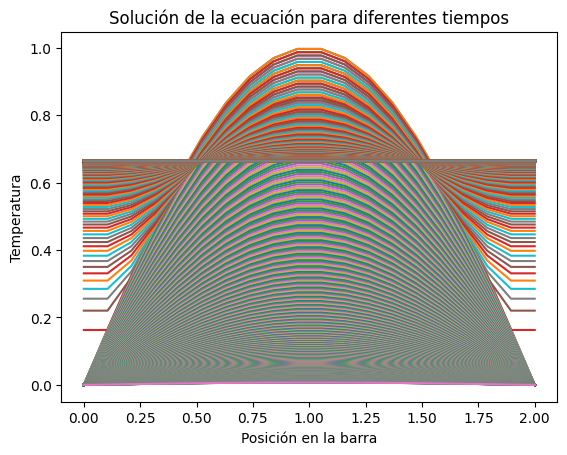

In [2]:
fil = 500 # Número de filas en la Matriz M
col = 20  # Número de columnas en la Matriz M

M = np.zeros((fil,col)) # En esta matriz se calculan los valores de la discretización (Dirichlet).
K = np.zeros((fil,col)) # En esta matriz se calculan los valores de la discretización (Neumann).

L = 2   # Longitud de la barra
T = 20  # Tiempo considerado
D = 0.1 # Constante de propagación del calor

ht = T/(fil-1)
hx = L/(col-1)

x = np.linspace(0,2,col)
M[0,:] = np.sin(np.pi*x/L) # Condición inicial
K[0,:] = np.sin(np.pi*x/L)

for n in range(fil-1):
  for m in range(1,col-1):
    M[n+1,m] = M[n,m] + (D*ht/hx**2)*(M[n,m+1] -2*M[n,m] + M[n,m-1]) # Discretización de la ecuación diferencial (Dirichlet)
    K[n+1,m] = K[n,m] + (D*ht/hx**2)*(K[n,m+1] -2*K[n,m] + K[n,m-1]) # Discretización de la ecuación diferencial (Neumann)
    K[n+1,-1] = K[n+1,-2] # Condición Neumann al extremo derecho
    K[n+1,0] = K[n+1,1] # Condición Neumann al extremo izquierdo
  plt.plot(x,M[n,:])
  plt.plot(x,K[n,:])
plt.title("Solución de la ecuación para diferentes tiempos")
plt.xlabel("Posición en la barra")
plt.ylabel("Temperatura")
plt.show()

## Animación

La evolución de la temperatura en la barra se entiende mejor al hacer una animación con la solución de la ecuación diferencial.

In [3]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

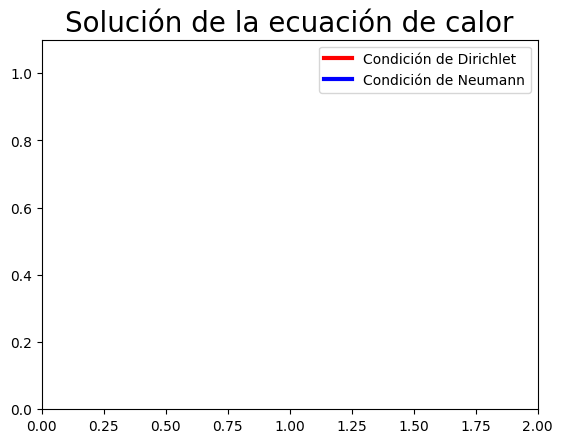

In [4]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((0, 1.1))

line, = ax.plot([], [], lw=3, color="red", label= "Condición de Dirichlet")
line2, = ax.plot([], [], lw=3, color="blue", label= "Condición de Neumann")
ax.set_title("Solución de la ecuación de calor", size = 20)
ax.legend();

In [5]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = M[i,:]
    z = K[i,:]
    line.set_data(x, y)
    line2.set_data(x, z)
    return (line, line2)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=fil, interval=100, blit=True)
HTML(anim.to_html5_video())

La animación se observa al ejecutar el código, GitHub no la genera automáticamente.

